<a href="https://colab.research.google.com/github/yvrjsharma/Keras-edition-deux/blob/main/Keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Keras and TensorFlow



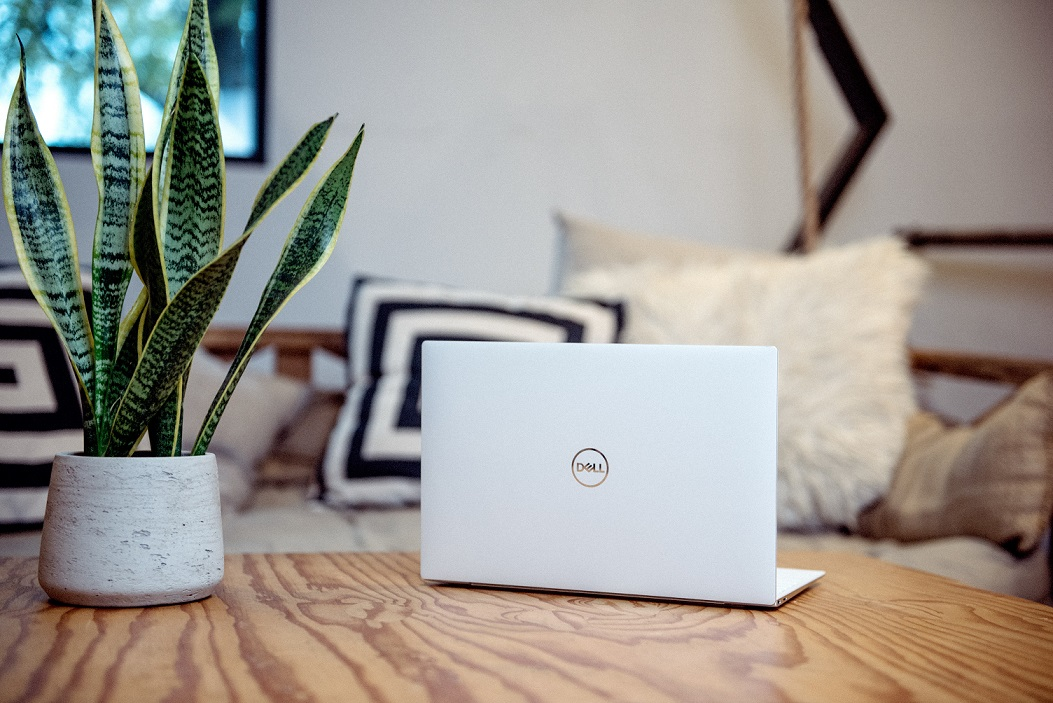
Photo by <a href="https://unsplash.com/@xps?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">XPS</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## Tensorflow and Keras

TensorFlow  | Keras 
-------------------|------------------
Low level Tensor manipulation using TensorFlow APIs        | High-level Deep Learning concepts 
Tensors store the network's state or variables | Layers which then combine into a Model
Tensor operations such as RELU, dot product  | Loss function, which acts as the feedback signal used for learning
Backpropagation to compute the gradient of mathematical expressions | Optimizer determines how learning proceeds
Backpropagation handled using GradientTape in TF | An Evaluation Metrics to gauge model performance. Training loop that performs miniSGD 

Lets play with the building blocks of Neural Networks - the Tensors

In [ ]:
import tensorflow as tf
#All ones
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [ ]:
#All zeros
x = tf.zeros((2,4))
x

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [ ]:
#Random tensors
x = tf.random.normal((3,1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-1.2951323 ],
       [ 1.3438333 ],
       [-0.90285814]], dtype=float32)>

In [ ]:
#More random
x = tf.random.uniform((3,1), minval=0., maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.14548361],
       [0.86150753],
       [0.69316435]], dtype=float32)>

Note that Tensorflow tensors are not mutable, however you can manipulate Numpy arrays easily.

This is the reason why we used the ```tf.Variable``` class to instantiate variable tensors, as variables in a model represent its state. To train a model we need to update the state.

In [ ]:
v = tf.Variable(initial_value= tf.random.normal((3,2)))
print(v)

#lets modify the state of a vraiable tensor
v.assign(tf.ones((3,2)))
print(v)

#another example, same as += or -= (assign_sub)
v.assign_add(tf.ones((3,2)))

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.1756237 ,  0.5466461 ],
       [-0.35883102, -0.13553353],
       [-0.31523743,  1.0844736 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 2) dtype=float32, numpy=
array([[2., 2.],
       [2., 2.],
       [2., 2.]], dtype=float32)>

## Tensorflow GradientTape API
Tensorflow can retrieve (or calculate) the gradient (or differentiation) of any differentiable expression with respect to its inputs (or coefficients).

Let's look at the below example where we use GradientTape API, apply some computation to input tensors and retrieve the gradient of the result with respect to input.

We use this API mostly to retrieve the gradient of the loss function with respect to its weights, something on the lines of :  ```gradients = tape.gradient(loss, weights)```

We can also calculate the *second order differentiates*, or to say gradient of a gradient using the same approach. There will be nested gradient tape scopes as shown in the second example below.

In [ ]:
#example 1
#an input variable, example consider it x in x^2 
input_var = tf.Variable(initial_value=3.)

#open gradient tape scope
with tf.GradientTape() as tape:
  #defining a function on input value x as x square
  result = tf.square(input_var)

#we will calculate gradient of the function inside Gradient Tepe Scope
#first argument is the function itself, 
#2nd argument is the variable with respect to which you have to calc the gradient
gradient1 = tape.gradient(result, input_var)
print(gradient1)


#example 2
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    result = 4.9*input_var**2
  result2 = inner_tape.gradient(result, input_var)
result3 = outer_tape.gradient(result2, input_var)

print(result2, result3)



tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(29.400002, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


## End-to-End Linear Classifier in TensorFLow

1. Generating random data for two classes - 

(1000, 2) (1000, 2)
(2000, 2)
(2000, 1)


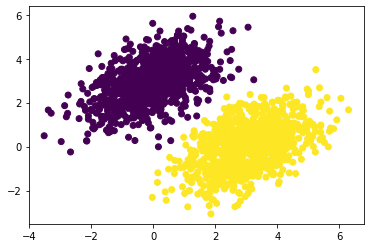

In [ ]:
import numpy as np

num_sampple_per_class = 1000
#generating data for class 1
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=num_sampple_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=num_sampple_per_class)

print(negative_samples.shape, positive_samples.shape)

#stacking both classes into single dataset array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

#generating labels for the two classes
targets = np.vstack((np.zeros((num_sampple_per_class,1),dtype="float32"),
                     np.ones((num_sampple_per_class,1),dtype="float32")))
print(targets.shape)

#Plotting the two classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

2. Next we will create a Linear classifier that will separate the two classes. A linear transformation is an affine transformation, ```prediction = W*inputs = b``` with loss function as difference between predictions and the targets. First we will initialize W and b with random variables and zeros respectively. 

In [ ]:
#2D inputs as (x,y)
input_dim = 2
#Output is a value, closer to 0 would mean class 0
output_dim = 1

#weights and biases
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

3. Writing the Forward Pass -

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

4. Writing Loss funcion - note that we are averaging the per sample loss scores into single scalar loss value. 

In [ ]:
#Mean square loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

5. Writing the training step and training loop -

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        #forward pass
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    #gradient of loss wrto weights
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    #weight update step
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.5037
Loss at step 1: 0.5253
Loss at step 2: 0.1841
Loss at step 3: 0.1401
Loss at step 4: 0.1270
Loss at step 5: 0.1178
Loss at step 6: 0.1096
Loss at step 7: 0.1022
Loss at step 8: 0.0954
Loss at step 9: 0.0892
Loss at step 10: 0.0835
Loss at step 11: 0.0783
Loss at step 12: 0.0736
Loss at step 13: 0.0693
Loss at step 14: 0.0654
Loss at step 15: 0.0618
Loss at step 16: 0.0585
Loss at step 17: 0.0555
Loss at step 18: 0.0528
Loss at step 19: 0.0503
Loss at step 20: 0.0480
Loss at step 21: 0.0459
Loss at step 22: 0.0440
Loss at step 23: 0.0423
Loss at step 24: 0.0407
Loss at step 25: 0.0393
Loss at step 26: 0.0379
Loss at step 27: 0.0367
Loss at step 28: 0.0356
Loss at step 29: 0.0346
Loss at step 30: 0.0337
Loss at step 31: 0.0329
Loss at step 32: 0.0321
Loss at step 33: 0.0314
Loss at step 34: 0.0307
Loss at step 35: 0.0302
Loss at step 36: 0.0296
Loss at step 37: 0.0291
Loss at step 38: 0.0287
Loss at step 39: 0.0283


6. Plotting 

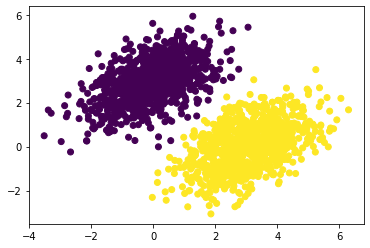

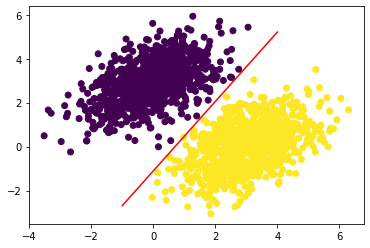

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)
plt.show()

x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Building a network using KEras API

* The fundamental data structure in Keras is the *layer*. Layers have weights, which are learned using stochastic gradient descent. These weights contain the *knowledge* of the world as gathered by the model. Building models in Keras involve clipping together compatible layers to create useful data-transformation layers pipelines.

In [6]:
import tensorflow as  tf
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  
  #creating weights
  def build(self,input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim,self.units),initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,), initializer="zero")
  
  #Defining forward pass
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


In [7]:
#instantiating
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
#test input
input_tensor = tf.ones(shape=(2,784))
#calling the layer we created
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


## Models in Keras
There are multiple model topologies in Keras, common ones are -

* Sequential models - simple stack of layers, mapping single input to single output
* Two-branch networks
* Multihead networks
* Residual networks

Topology defines a *hypothesis space*. In this hypothesis space you search for some useful representations of input data, using guidance from a feedback signal (such as loss). Network topologies help you constraining this hypothesis space or your space of possibilities, to a specific series of tensor operations which map input data to output data. Picking the right network is very important, as it encodes the assumptions we make about our problem and data.

## Compile and Training steps

After defining the model structure, you need to also define loss, optimizer, and the metrics that you wish to measure. Together they constitute the model *Compile* step in Keras.
* Loss function - what will be minimized during training, for example, CategoricalCrossentropy, SparseCategoricalCrossentropy, BinaryCrossentropy, MeanSquaredError, KLDivergence, CosineSimilarity, *etc.* You can pick up the Loss function depending on the type of problem you are solving. For instance, use binary crossentropy for a two-class classification and cross-entropy classification for multi class classification.
* Optimizer - how the network weights will be updated, for example, SGD, RMSprop, Adam, Adagrad, *etc.* 
* Metrics - what measure of success you want to monitor as a model success during training epochs, for example, CategoricalAccuracy, SparseCategoriicalAccuracy, BinaryAccuracy, AUC, Precision, Recall, *etc.*
* Model.compile() - where you define loss, optimizer, metrics.

```
model.compile(loss="mean_squared_error",
              optimizer="rmsprop",
              metrics=["accuracy"])
```

* Model.fit() - After compiling comes the fit method. This is how you start training your model on training data. This step implements the training loop and has the following constituents -
    * Input data and targets to train on. They both can be *Numpy* arrays or Tensorflow Dataset objects.
    * Number of epochs to the training for - means how many times the model goes over the training data.
    * Batch size - it is used within an epoch while doing mini-batch gradient descent. These are the number of training samples to use before computing the gradients for one weights update.

```
model.fit(inputs,
          targets,
          epochs=100,
          batch_size=128)
```

## Model validation
* A model performing well on training data doesn't guarantee that model will perform well in general on unseen data.
* If *overtrained*, a model tends to memorize the mappings between training data and targets and thus may fail considerably when tested on new data.
* To avoid this, the practice is to reserve a part of training data as a *validataion set*. You won't be training on this set, however you will use it to compute the loss value and metrics value at every epoch while training.
* The validation data is passed in the model.fit() step like the training data.

## Inference
* Making predictions on new data (may be *test* data) is called model *inference.*
* One way to make inferences is to use the model.predict() method. It will iterate over data in batches specified. It can process both numpy arrays as well as Tensorflow Dataset objects. The method returns a *numpy* array of class predictions.


#### Bringing everything together now -

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

#Shuffing the data before creating val and train sets
#this helps in avoiding one type of data from passing into val set
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

#creating 30% as val set and rest as train set
num_validation_samples = int(0.3* len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

#training loop
model.fit(training_inputs, training_targets,
          epochs=5, 
          batch_size=16,
          validation_data=(val_inputs, val_targets))

#to get validatio loss and metrics values in batches
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

#inference
model.predict(new_inputs, batch_size=128)

## Conclusion
* Tensorflow is a numerical computing framework that can run on CPU, GPU and TPU, however you will have to program your code accordingly.
* For doing deep learning, the key characteristics of tensorflow used are - tensors, tf.Variable, various mathematical tensor operations, and lastly the GradientTape functionality.
* Keras API is a deep learning API defined over tensorflow.
* *Layer* is the central class in Keras. It encapsulates weights computations. Models consists of various layers, and they define the hypothesis space in which input data is represented and processed in the best possible way.
* optimizer, loss and some metrics are what you need to ascertain before starting the training loop. Done in model.compile() step.
* model.fit() not only helps you train in mini-batches over training data but also helps you in monitoring the models performance on a *new* validation dataset.
* Lastly, model.predict() gives you inferences from the trained model an you use it on another fresh set of inputs.